In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup



In [2]:
df = pd.read_csv('train.csv')

In [3]:
new_df = df.sample(30000,random_state=2)
new_df['is_duplicate'].value_counts()

0    19013
1    10987
Name: is_duplicate, dtype: int64

In [4]:
new_df[['question1','question2','is_duplicate']].iloc[4]

question1                     Consequences of Bhopal gas tragedy?
question2       What was the reason behind the Bhopal gas trag...
is_duplicate                                                    0
Name: 151235, dtype: object

In [5]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [6]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [7]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

C:\Users\sajal\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [8]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0


In [9]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [10]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))


In [11]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [12]:
new_df['word_common'] = new_df.apply(common_words, axis=1)


In [13]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [14]:
new_df['word_total'] = new_df.apply(total_words, axis=1)


In [15]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)


In [16]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [17]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [18]:
!pip install distance

In [19]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [20]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [21]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [22]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [23]:
print(new_df.shape)

(30000, 28)


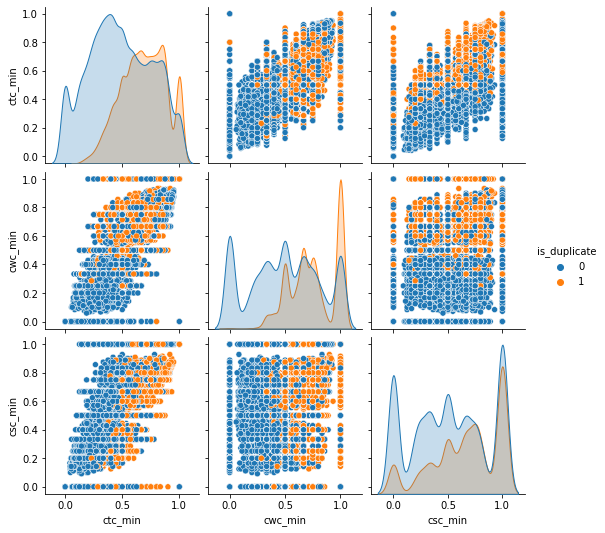

In [24]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

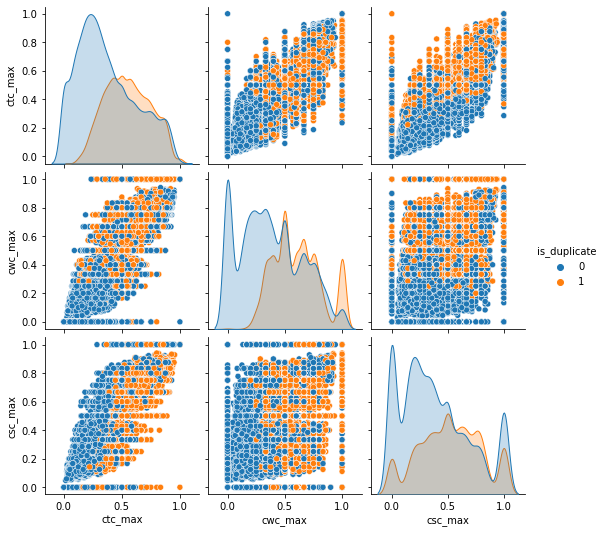

In [25]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

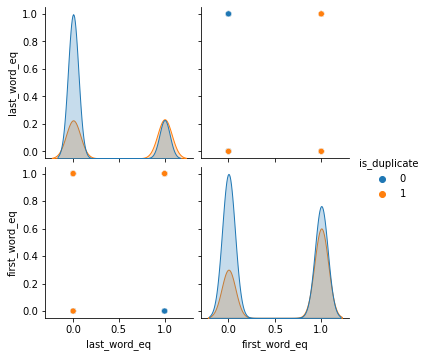

In [26]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

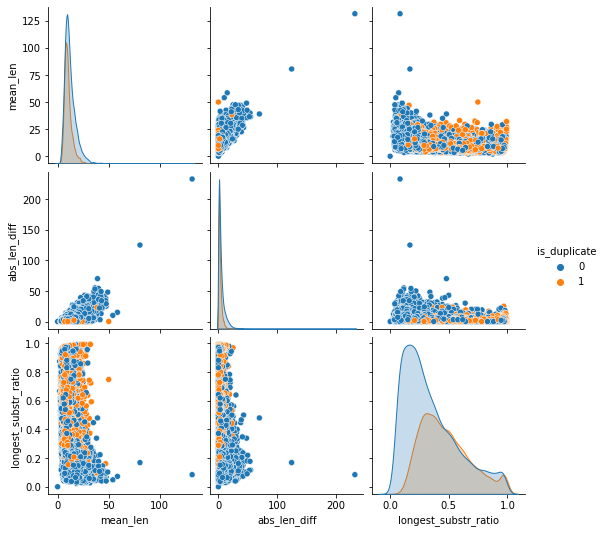

In [27]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

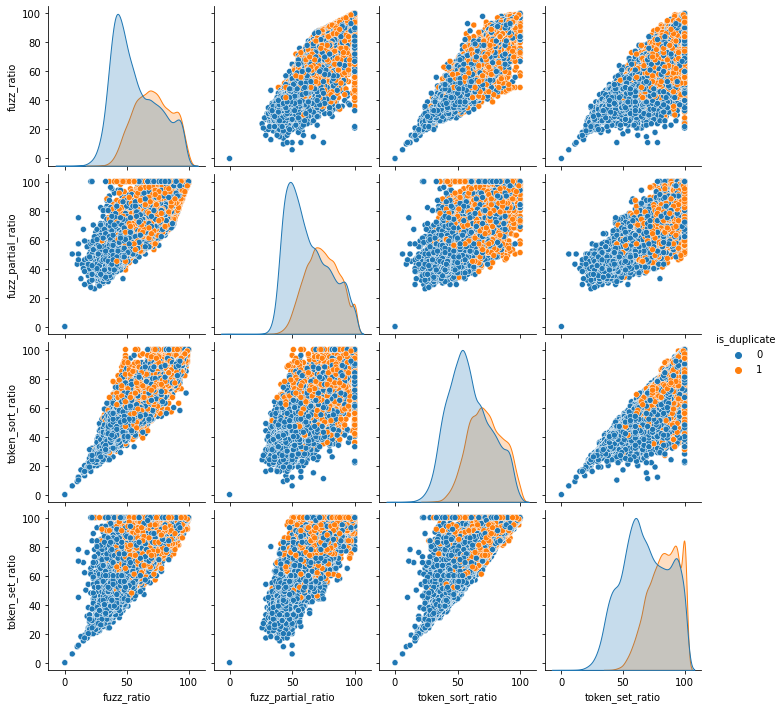

In [28]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [36]:
ques_df = new_df[['question1','question2']]
ques_df.head(4)

,question1,question2
398782,what is the best marketing automation tool for...,what is the best marketing automation tool for...
115086,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
327711,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
367788,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...


In [357]:
# ques_df.loc[253687]

question1              how did benjamin franklin die
question2    how was benjamin franklin so productive
Name: 253687, dtype: object

In [37]:
import gensim

In [38]:
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [39]:
ques_sent = []
for sentence in questions:
    ques_sent.append(gensim.utils.simple_preprocess(sentence))

In [43]:
model  = gensim.models.Word2Vec(window=2,min_count=3,sg=1,vector_size=100)

In [44]:
model.build_vocab(ques_sent)

In [45]:
model.train(corpus_iterable=ques_sent,total_examples= model.corpus_count, epochs=model.epochs)

(2174551, 3150050)

In [46]:
w2v = dict(zip(model.wv.index_to_key, (model.wv.vectors.round(3))))

In [266]:
w2v['pakistan']

array([-0.127,  0.418,  0.115, -0.057, -0.381, -0.338,  0.221,  0.689,
       -0.117,  0.092,  0.072, -0.527,  0.168,  0.171, -0.031, -0.324,
        0.208, -0.285, -0.07 , -0.23 , -0.227,  0.757,  0.022,  0.393,
       -0.203, -0.427, -0.378,  0.285, -0.481,  0.002,  0.274, -0.431,
        0.501, -0.584, -0.651,  0.878,  0.058, -0.573, -0.128,  0.073,
       -0.523,  0.083, -0.268, -0.41 ,  0.189, -0.187, -0.09 ,  0.195,
       -0.329,  0.095,  0.588, -0.386,  0.08 , -0.58 ,  0.142,  0.296,
       -0.12 ,  0.   , -0.582, -0.089, -0.132, -0.167,  0.639, -0.188,
        0.017,  0.162, -0.341,  0.177, -0.211,  0.215, -0.212,  0.15 ,
        0.344, -0.038,  0.595,  0.348, -0.139, -0.007, -0.226, -0.165,
       -0.301, -0.402, -0.322,  0.062, -0.159,  0.188,  0.488, -0.22 ,
        0.071,  0.247,  0.456,  0.423,  0.165, -0.425,  0.669, -0.07 ,
       -0.441,  0.354,  0.156,  0.169], dtype=float32)

In [267]:
w2v['india']

array([ 0.039, -0.5  , -0.179, -0.054, -0.374, -0.362,  0.335,  0.532,
       -0.221, -0.292, -0.01 , -0.325, -0.319, -0.154, -0.18 , -0.552,
        0.244, -0.873,  0.146, -0.4  , -0.08 ,  0.185,  0.093, -0.106,
       -0.138, -0.289,  0.096,  0.079, -0.176,  0.09 ,  0.72 , -0.434,
        0.185, -0.706, -0.544,  0.721, -0.164,  0.283,  0.106, -0.323,
       -0.323,  0.12 , -0.423, -0.008,  0.523, -0.183, -0.342,  0.289,
       -0.002,  0.187,  0.236, -0.071,  0.201, -0.569,  0.143,  0.242,
       -0.026, -0.05 , -0.09 ,  0.271, -0.033, -0.409,  1.029,  0.12 ,
       -0.216,  0.48 , -0.343,  0.144, -0.056,  0.416, -0.079,  0.388,
       -0.197, -0.2  ,  0.606,  0.204, -0.447, -0.145,  0.336, -0.414,
        0.066, -0.74 , -0.229, -0.793, -0.141,  0.034,  0.587, -0.74 ,
        0.371,  0.602,  0.475, -0.19 ,  0.156, -0.6  ,  0.392,  0.076,
       -0.412, -0.031,  0.143,  0.4  ], dtype=float32)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
tfidf1 = TfidfVectorizer()

In [49]:
tfidf1.fit_transform(questions)

<60000x26200 sparse matrix of type '<class 'numpy.float64'>'
	with 606923 stored elements in Compressed Sparse Row format>

In [ ]:
a = tfidf1.vocabulary_.items()

In [50]:
word2weight = [(w, round(tfidf1.idf_[i])) for w, i in tfidf1.vocabulary_.items()]

In [51]:
word2weight = dict(word2weight)

In [272]:
model.wv.similar_by_word('pakistan',topn=15)

[('russia', 0.9169657230377197),
 ('china', 0.891922652721405),
 ('kashmir', 0.8530499935150146),
 ('declare', 0.8508397936820984),
 ('strike', 0.8356758952140808),
 ('surgical', 0.8299412131309509),
 ('attack', 0.8285477757453918),
 ('israel', 0.8246318697929382),
 ('terrorists', 0.822750449180603),
 ('nuclear', 0.8116011619567871),
 ('vietnam', 0.8110670447349548),
 ('north', 0.8103905916213989),
 ('communist', 0.8092495203018188),
 ('declared', 0.8078942894935608),
 ('america', 0.8070010542869568)]

In [287]:
# if "" in questions:
#     print(questions.index("",30000,60000))
#     print(questions[57035:57038])

57036
['i will be graduating from bits pilani next year  how do i get job offers from abroad', '', 'can i drive for uber in new zealand while i am visiting on a tourist visa']


In [319]:
# print(questions[0])
# print(questions[30000])

what is the best marketing automation tool for small and mid size companies
what is the best marketing automation tool for small and mid sized companies


In [229]:
def document_vector(doc):
    if len(doc.split()) == 0:
        return np.zeros(shape=(100))
    elif len(doc.split()) == 1:
        return np.zeros(shape=(100))
    else:
#         doc = [word for word in doc.split() if word in model.wv.index_to_key]
#         return np.mean(model.wv[doc],axis=0).round(2)
        doc_vec = []
        tfidf_weight_sum = 0
        for word in doc.split():
            if word in w2v.keys() and word in word2weight.keys():
                tfidf_weight = word2weight[word]*doc.split().count(word)/len(doc.split())
                product = (w2v[word]*tfidf_weight)
                doc_vec.append(product)
                tfidf_weight_sum = tfidf_weight_sum + tfidf_weight
                #print(f"weight of {word} : {word2weight[word]}")
                #print(f"word vector of {word} : {w2v[word]}")
                #print(product)\n",
        #print(doc_vec)
        if len(doc_vec) == 0:
            return np.round(np.sum(doc_vec,axis=0)/1,3)
        else:
            return np.round(np.sum(doc_vec,axis=0)/tfidf_weight_sum,3)

In [61]:
from tqdm import tqdm

In [102]:
X = []
for doc in tqdm(ques_df['question1']):
    X.append(document_vector(doc))

100%|██████████████████████████████████████████████████████████████████████████| 30000/30000 [00:03<00:00, 9200.79it/s]


In [103]:
X2 = []
for doc in tqdm(ques_df['question2']):
    X2.append(document_vector(doc))

100%|█████████████████████████████████████████████████████████████████████████| 30000/30000 [00:02<00:00, 10326.55it/s]


In [104]:
X = np.array(X)

In [105]:
X2 = np.array(X2)

In [305]:
complete_df.columns[0:24]

Index([        'is_duplicate',               'q1_len',               'q2_len',
               'q1_num_words',         'q2_num_words',          'word_common',
                 'word_total',           'word_share',              'cwc_min',
                    'cwc_max',              'csc_min',              'csc_max',
                    'ctc_min',              'ctc_max',         'last_word_eq',
              'first_word_eq',         'abs_len_diff',             'mean_len',
       'longest_substr_ratio',           'fuzz_ratio',   'fuzz_partial_ratio',
           'token_sort_ratio',      'token_set_ratio',                      0],
      dtype='object')

In [311]:
complete_df.iloc[0][1:].values.shape

(222,)

In [108]:
temp_df1 = pd.DataFrame(X, index= new_df.index)
temp_df2 = pd.DataFrame(X2, index= new_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

In [109]:
temp_df.shape

(30000, 200)

In [110]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)

(30000, 23)


In [111]:
complete_df = pd.concat([final_df, temp_df], axis=1)
print(complete_df.shape)
complete_df.head()

(30000, 223)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,90,91,92,93,94,95,96,97,98,99
398782,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0.256,0.098,-0.074,-0.040,0.312,0.228,-0.004,-0.133,0.089,-0.070
115086,0,48,56,13,16,8,24,0.33,0.666644,0.499988,...,0.227,0.072,-0.025,0.097,0.498,-0.029,0.244,-0.160,0.061,-0.165
327711,0,104,119,28,21,4,38,0.11,0.000000,0.000000,...,0.212,0.129,-0.022,-0.000,0.363,0.093,-0.173,-0.151,0.098,-0.106
367788,0,58,145,14,32,1,34,0.03,0.000000,0.000000,...,0.371,0.094,0.268,0.159,0.672,-0.116,0.314,0.289,0.005,0.138
151235,0,34,49,5,9,3,13,0.23,0.749981,0.599988,...,0.176,0.057,0.113,-0.088,0.438,0.160,-0.059,0.033,0.003,-0.101


In [331]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(complete_df.iloc[:,1:],complete_df.iloc[:,0],test_size=0.2,random_state=1)

In [322]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(complete_df.iloc[:,1:].values,complete_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=250,criterion='gini',n_jobs=4)
rf.fit(X_train_stdscaled,y_train)
y_pred = rf.predict(X_test_stdscaled)
accuracy_score(y_test,y_pred)

0.7866666666666666

In [75]:
!pip install xgboost

In [264]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eta=0.1,n_estimators=200,n_jobs=4, learning_rate=0.1)
xgb.fit(X_train_stdscaled,y_train)
y_pred1 = xgb.predict(X_test_stdscaled)
accuracy_score(y_test,y_pred1)

0.8011666666666667

In [411]:
# count_0 =0
# count_1 = 0
# for element in y_pred1:
#     if element == 0:
#         count_0 +=1
#     else:
#         count_1 +=1
# print(f"count of 0's :{count_0}")
# print(f"count of 1's :{count_1}")
print(f"ytest scores for head 10:\n{y_te.iloc[0:10]}\n")
print(f"ypred scores for head 10:\n{y_pred1[0:10]}")

ytest scores for head 10:
253687    0
271748    1
298404    0
8307      0
243342    0
259056    0
286175    1
157118    0
192097    0
342692    1
Name: is_duplicate, dtype: int64

ypred scores for head 10:
[0 1 0 0 0 0 1 0 0 1]


In [412]:
a = X_te.loc[253687].values.reshape(1,222)

In [400]:
a = np.round(a,1)

In [421]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stdscaled = scaler.transform(X_train)
X_test_stdscaled = scaler.transform(X_test)

In [116]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_stdscaled,y_train)
lr_pred = lr.predict(X_test_stdscaled)
accuracy_score(y_test,lr_pred)

0.7533333333333333

In [329]:
def LogisticRegression_with_threshold(threshold):
    y_scores = lr.predict_proba(X_test_stdscaled)[:, 1]
    y_pred_with_threshold = np.rint(y_scores >= threshold)#.astype(int)
    print(type(y_scores))
    return accuracy_score(y_test,y_pred_with_threshold)
    

In [330]:
LogisticRegression_with_threshold(0.4)

<class 'numpy.ndarray'>


0.7536666666666667

In [78]:
from sklearn.metrics import confusion_matrix

In [117]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3183,  629],
       [ 651, 1537]], dtype=int64)

In [118]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3251,  561],
       [ 632, 1556]], dtype=int64)

In [81]:
# for logistic model
confusion_matrix(y_test,lr_pred)

array([[3179,  633],
       [ 817, 1371]], dtype=int64)

CREATING TEST POINT QUERY NOW

In [366]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [367]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [368]:
def test_fetch_token_features(q1,q2): 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + 0.001)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + 0.001)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + 0.001)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + 0.001)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + 0.001)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + 0.001)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [369]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [370]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [391]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # word2vec feature for q1
    q1_word2vec = document_vector(q1)
    
    # word2vec feature for q2
    q2_word2vec = document_vector(q2)
    
    #print(q1_word2vec)
    
    #print(q2_word2vec)
        
#     #return np.array(input_query).shape,q1_word2vec.shape,q2_word2vec.shape
    return np.hstack([np.array(input_query).reshape(1,22),q1_word2vec.reshape(1,100),q2_word2vec.reshape(1,100)])

In [417]:
q1 = 'how did benjamin franklin die'
q2 = 'how was benjamin franklin so productive'
q3 = 'Which city serves as the capital of pakistan?'
q4 = 'What is the business capital of India?'

In [402]:
# b = query_point_creator(q1,q2)
# b = np.round(b,1)

In [403]:
print(a.shape)
print(b.shape)

(1, 222)
(1, 222)


In [404]:
#print(np.array_equal(a,b))  # test if same shape, same elements values
#print(np.array_equiv(a,b))  # test if broadcastable shape, same elements values
print(np.allclose(a,b))      # test if same shape, elements have close enough values

True


In [418]:
xgb.predict(scaler.transform(query_point_creator(q3,q4)))

array([0])

In [123]:
import pickle

In [149]:
pickle.dump(xgb,open('model.pkl','wb'))
pickle.dump(document_vector,open('document_vector.pkl','wb'))

In [235]:
import xgboost as xgb

xgb.__version__

'1.7.1'

In [248]:
pickle.dump(tfidf1,open('tfidf.pkl','wb'))

In [249]:
pickle.dump(model,open('gensim_created_model.pkl','wb'))
pickle.dump(w2v,open('word2vec_dict.pkl','wb'))
pickle.dump(word2weight,open('tfidf_weight_dict.pkl','wb'))

In [420]:
pickle.dump(scaler,open('stdscaler.pkl','wb'))